<a href="https://colab.research.google.com/github/Shufen-Yin/Artificial-Intelligence/blob/main/Assignment_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Data Analysis and Cleaning
# 1: Load the Dataset
df = pd.read_csv("bank-loan.csv")

print("First 5 rows:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

print("\nColumns in dataset:")
print(df.columns)

# Check target distribution (default)
print("\nValue counts of target variable 'default':")
print(df["default"].value_counts())



First 5 rows:
   age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608      1.0
1   27   1      10        6      31     17.3   1.362202  4.000798      0.0
2   40   1      15       14      55      5.5   0.856075  2.168925      0.0
3   41   1      15       14     120      2.9   2.658720  0.821280      0.0
4   24   2       2        0      28     17.3   1.787436  3.056564      1.0

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    floa

In [3]:
# 3. Missing values analysis
# -------------------------------
print("\nMissing values per column:")
print(df.isnull().sum())

# List of numerical columns
num_cols = ["age", "ed", "employ", "address", "income", "debtinc", "creddebt", "othdebt"]

# Fill numerical missing values with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Drop rows where target is missing (if any)
df = df.dropna(subset=["default"])

print("\nMissing values after cleaning:")
print(df.isnull().sum())



Missing values per column:
age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

Missing values after cleaning:
age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64


/tmp/ipython-input-1773931839.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


<Figure size 1200x800 with 0 Axes>

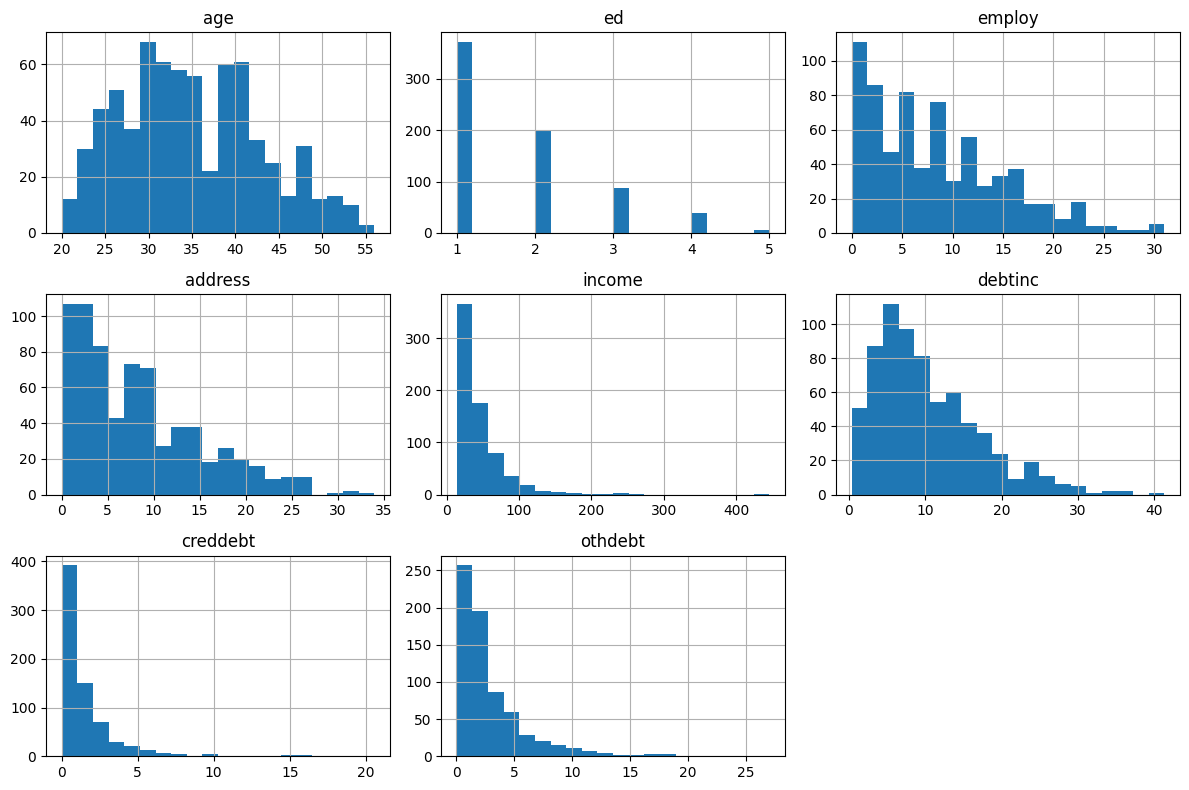

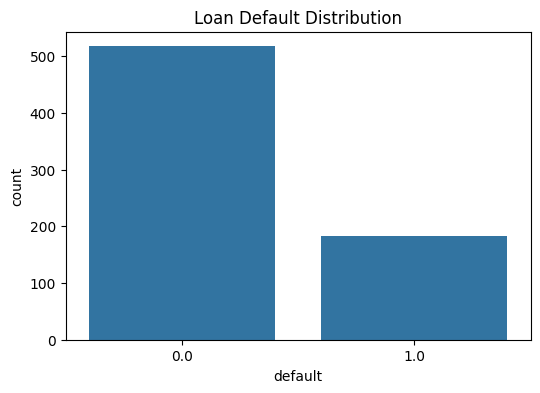

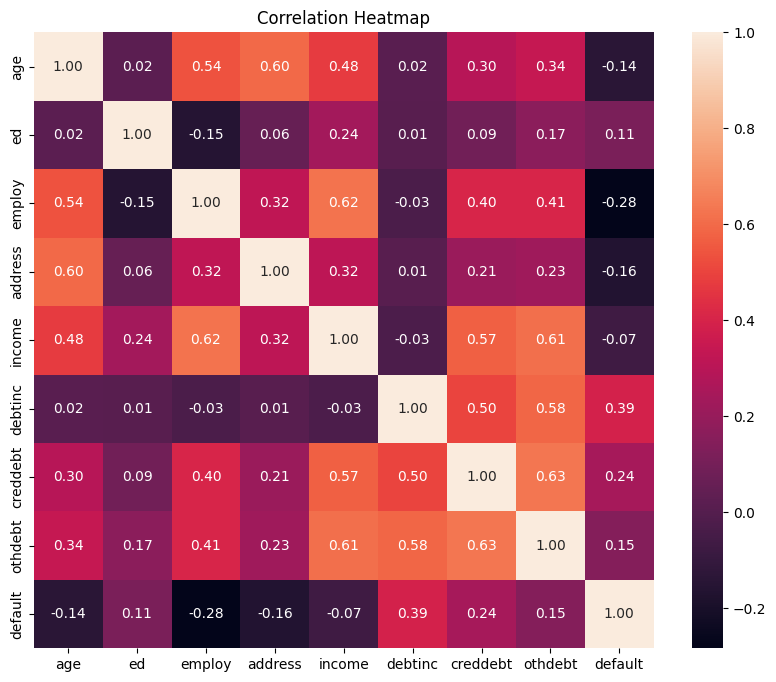

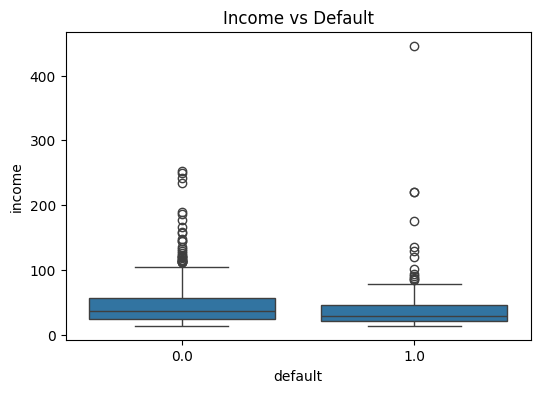

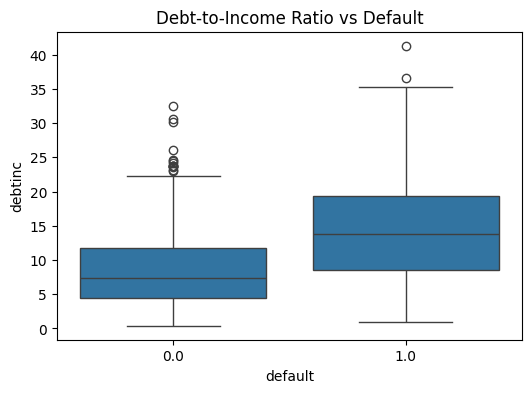

In [4]:
# 4. Exploratory Data Analysis (EDA)
# -------------------------------

# 4.1 Histograms for numerical variables
plt.figure(figsize=(12, 8))
df[num_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# 4.2 Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="default", data=df)
plt.title("Loan Default Distribution")
plt.show()

# 4.3 Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[num_cols + ["default"]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 4.4 Relationship between income and default
plt.figure(figsize=(6, 4))
sns.boxplot(x="default", y="income", data=df)
plt.title("Income vs Default")
plt.show()

# 4.5 Relationship between debt-to-income ratio and default
plt.figure(figsize=(6, 4))
sns.boxplot(x="default", y="debtinc", data=df)
plt.title("Debt-to-Income Ratio vs Default")
plt.show()


In [5]:
# -------------------------------
# 5. Feature scaling and train-test split
# -------------------------------

# Features (X) and target (y)
X = df[num_cols]          # only numerical features
y = df["default"]         # target variable

# Scale numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nShapes of datasets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of datasets:
X_train: (560, 8)
X_test: (140, 8)
y_train: (560,)
y_test: (140,)


In [6]:
# Task 2 Feature Engineering
# --------------------------------------------
# 1. Create new features
# --------------------------------------------
import numpy as np

# 1.1 Total debt = credit debt + other debt
df["total_debt"] = df["creddebt"] + df["othdebt"]

# 1.2 Debt-to-income ratio based on total debt (if income is zero, avoid division error)
df["total_debt_to_income"] = df["total_debt"] / (df["income"] + 1e-6)

# 1.3 Credit debt share in total debt (if total_debt is zero, avoid division error)
df["creddebt_share"] = df["creddebt"] / (df["total_debt"] + 1e-6)

# 1.4 Employment category: short / medium / long term
df["employ_cat"] = pd.cut(
    df["employ"],
    bins=[-1, 1, 5, np.inf],
    labels=["short_term", "mid_term", "long_term"]
)

# 1.5 Age group: youth / adult / senior
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 25, 45, np.inf],
    labels=["youth", "adult", "senior"]
)

# 1.6 High debt indicator (1 if debtinc > 35%, else 0)
df["high_debt_flag"] = (df["debtinc"] > 35).astype(int)

print("\nNew feature columns added:")
print(["total_debt", "total_debt_to_income", "creddebt_share", "employ_cat", "age_group", "high_debt_flag"])

print("\nPreview of new features:")
print(df[["age", "employ", "income", "debtinc", "creddebt", "othdebt",
          "total_debt", "total_debt_to_income", "creddebt_share",
          "employ_cat", "age_group", "high_debt_flag"]].head())



New feature columns added:
['total_debt', 'total_debt_to_income', 'creddebt_share', 'employ_cat', 'age_group', 'high_debt_flag']

Preview of new features:
   age  employ  income  debtinc   creddebt   othdebt  total_debt  \
0   41      17     176      9.3  11.359392  5.008608      16.368   
1   27      10      31     17.3   1.362202  4.000798       5.363   
2   40      15      55      5.5   0.856075  2.168925       3.025   
3   41      15     120      2.9   2.658720  0.821280       3.480   
4   24       2      28     17.3   1.787436  3.056564       4.844   

   total_debt_to_income  creddebt_share employ_cat age_group  high_debt_flag  
0                 0.093           0.694  long_term     adult               0  
1                 0.173           0.254  long_term     adult               0  
2                 0.055           0.283  long_term     adult               0  
3                 0.029           0.764  long_term     adult               0  
4                 0.173           0.369 

In [7]:
# --------------------------------------------
# 2. Encode categorical engineered features
# --------------------------------------------
cat_features = ["employ_cat", "age_group"]
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

print("\nColumns after one-hot encoding:")
print(df.columns)



Columns after one-hot encoding:
Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default', 'total_debt', 'total_debt_to_income',
       'creddebt_share', 'high_debt_flag', 'employ_cat_mid_term',
       'employ_cat_long_term', 'age_group_adult', 'age_group_senior'],
      dtype='object')


In [8]:
# --------------------------------------------
# 3. Scale numerical features
# --------------------------------------------
from sklearn.preprocessing import StandardScaler

# Numerical columns for scaling
num_cols_fe = [
    "age", "ed", "employ", "address",
    "income", "debtinc", "creddebt", "othdebt",
    "total_debt", "total_debt_to_income", "creddebt_share"
]

scaler = StandardScaler()
df[num_cols_fe] = scaler.fit_transform(df[num_cols_fe])

print("\nScaled numerical feature sample:")
print(df[num_cols_fe].head())



Scaled numerical feature sample:
        age        ed    employ   address    income   debtinc  creddebt  \
0  0.768304  1.376911  1.294313  0.545664  3.544603 -0.140798  4.634831   
1 -0.983529 -0.779325  0.242201 -0.334101 -0.396908  1.031818 -0.090444   
2  0.643173 -0.779325  0.993709  0.838919  0.255480 -0.697790 -0.329670   
3  0.768304 -0.779325  0.993709  0.838919  2.022364 -1.078890  0.522369   
4 -1.358922  0.298793 -0.960214 -1.213867 -0.478457  1.031818  0.110547   

    othdebt  total_debt  total_debt_to_income  creddebt_share  
0  0.593692    2.396269             -0.140798        2.129668  
1  0.286919    0.153125              1.031818       -0.408623  
2 -0.270693   -0.323429             -0.697790       -0.241327  
3 -0.680910   -0.230686             -1.078890        2.533486  
4 -0.000501    0.047337              1.031818        0.254794  


In [9]:
# --------------------------------------------
# 4. Prepare final X, y for modeling
# --------------------------------------------

# Define feature set X and target y
X = df.drop("default", axis=1)
y = df["default"]

print("\nFinal shape of X and y:")
print("X shape:", X.shape)
print("y shape:", y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTrain/Test split shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



Final shape of X and y:
X shape: (700, 16)
y shape: (700,)

Train/Test split shapes:
X_train: (560, 16)
X_test: (140, 16)
y_train: (560,)
y_test: (140,)


In [10]:
# Task 3 – Model Building & Evaluation (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Train a Random Forest model
# -------------------------------

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight="balanced"   # helps if classes are imbalanced
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [11]:
# -------------------------------
# 2. Predictions
# -------------------------------

y_pred = rf_model.predict(X_test)

# -------------------------------
# 3. Accuracy
# -------------------------------

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy on Test Set: {:.4f}".format(accuracy))

Random Forest Accuracy on Test Set: 0.8214



Confusion Matrix:
[[94  9]
 [16 21]]


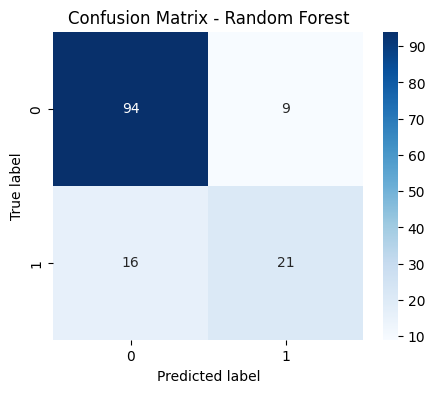

In [12]:
# -------------------------------
# 4. Confusion Matrix
# -------------------------------

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [13]:
# -------------------------------
# 5. Classification Report
# -------------------------------

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))



Classification Report:
              precision    recall  f1-score   support

         0.0     0.8545    0.9126    0.8826       103
         1.0     0.7000    0.5676    0.6269        37

    accuracy                         0.8214       140
   macro avg     0.7773    0.7401    0.7547       140
weighted avg     0.8137    0.8214    0.8150       140




Top 15 most important features:
                 feature  importance
2                 employ    0.122203
9   total_debt_to_income    0.114950
5                debtinc    0.110757
6               creddebt    0.093152
8             total_debt    0.091937
10        creddebt_share    0.082780
7                othdebt    0.077668
0                    age    0.074448
3                address    0.070443
4                 income    0.069407
13  employ_cat_long_term    0.046679
1                     ed    0.022525
12   employ_cat_mid_term    0.009027
14       age_group_adult    0.008711
15      age_group_senior    0.005311


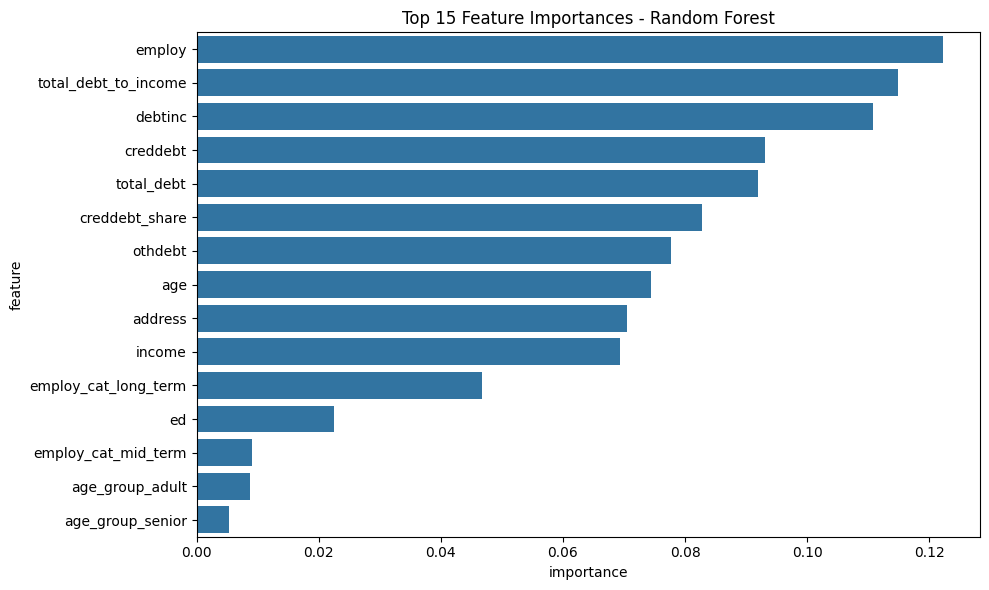

In [14]:
# -------------------------------
# 6. Feature Importance
# -------------------------------

importances = rf_model.feature_importances_
feature_names = X.columns

# Create a table of feature importance
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
})

feat_imp = feat_imp.sort_values(by="importance", ascending=False)

print("\nTop 15 most important features:")
print(feat_imp.head(15))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x="importance",
    y="feature",
    data=feat_imp.head(15)
)
plt.title("Top 15 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

In [32]:
# Task 4 Explainability and Fairness Analysis
# 1 Use SHAP to explain model predictions and interpret the results.
# Convert X_train and X_test to DataFrame if they are not already
#1). Install and import SHAP
!pip install shap

# 2） Import libraries
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 3) Ensure X_train and X_test are DataFrames with same columns
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=X.columns)
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X.columns)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# 4) Create SHAP TreeExplainer for Random Forest
explainer = shap.TreeExplainer(rf_model)


X_train shape: (560, 16)
X_test shape: (140, 16)


In [33]:
# 5) Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# 6) Extract class 1 (default) SHAP values
shap_vals_class1 = shap_values[:, :, 1]  # shape: (n_samples, n_features)
assert shap_vals_class1.shape == X_test.shape, "SHAP shape mismatch!"


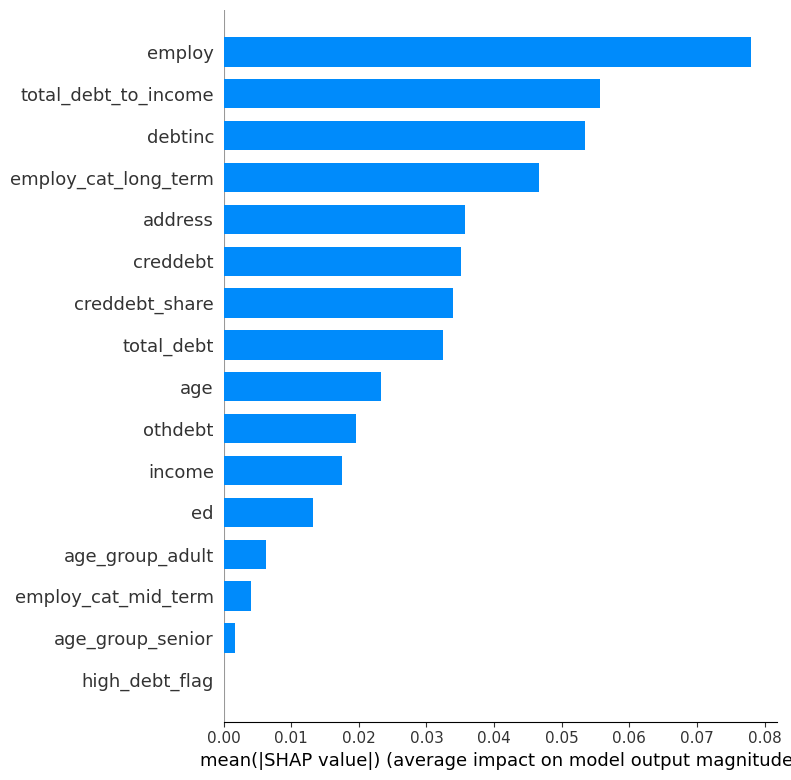

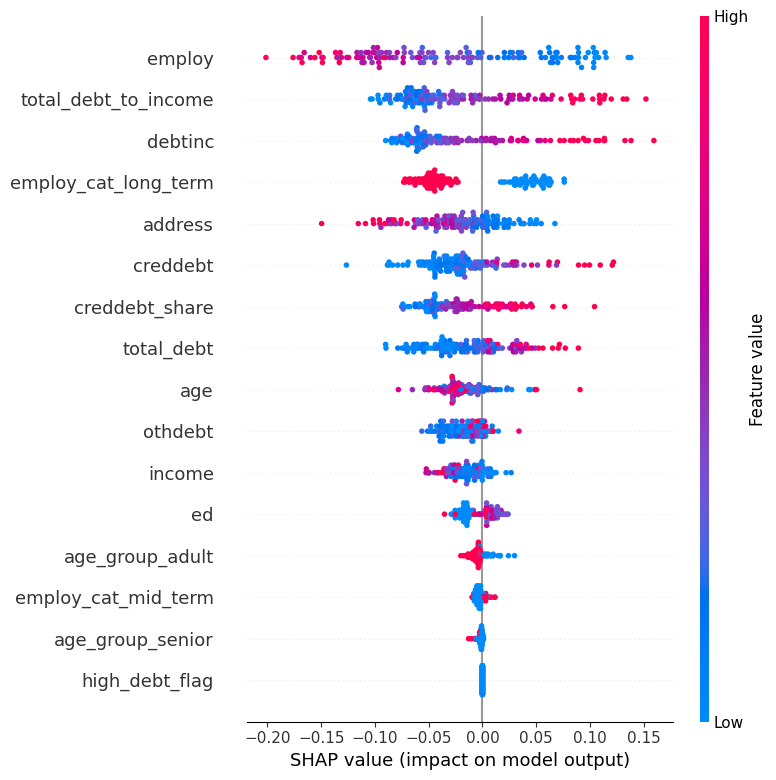

In [34]:
# -----------------------------
# Global explainability
# -----------------------------
shap.initjs()
shap.summary_plot(shap_vals_class1, X_test, plot_type="bar")      # bar plot
shap.summary_plot(shap_vals_class1, X_test)                        # beeswarm plot



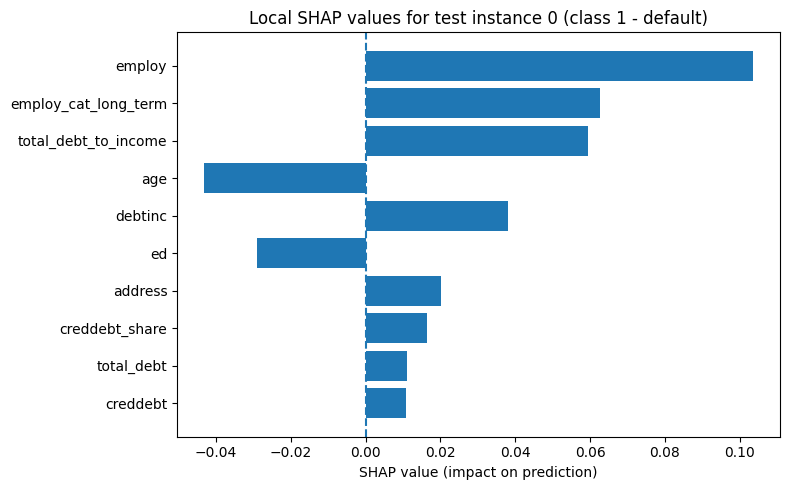

In [35]:
# Local explainability (non-JS bar plot)
# -----------------------------
idx = 0  # choose a test instance
x_example = X_test.iloc[[idx]]

# SHAP for this instance
shap_values_example = explainer.shap_values(x_example)
shap_vals_example_class1 = shap_values_example[0, :, 1]  # class 1

feature_names = X_test.columns
abs_vals = np.abs(shap_vals_example_class1)
sorted_idx = np.argsort(abs_vals)[::-1]
top_n = 10
top_idx = sorted_idx[:top_n]

plt.figure(figsize=(8, 5))
plt.barh(
    [feature_names[i] for i in top_idx][::-1],
    [shap_vals_example_class1[i] for i in top_idx][::-1]
)
plt.axvline(0, linestyle="--")
plt.title(f"Local SHAP values for test instance {idx} (class 1 - default)")
plt.xlabel("SHAP value (impact on prediction)")
plt.tight_layout()
plt.show()

In [36]:
# Show prediction probabilities and feature values
print("Prediction probabilities for this instance:", rf_model.predict_proba(x_example))
print("Feature values for this instance:\n", x_example.iloc[0])


Prediction probabilities for this instance: [[0.27 0.73]]
Feature values for this instance:
 age                      0.26778
ed                     -0.779325
employ                 -1.110515
address                -0.773984
income                 -0.587188
debtinc                 0.709349
creddebt                0.117019
othdebt                 -0.37603
total_debt             -0.201335
total_debt_to_income    0.709349
creddebt_share          0.993206
high_debt_flag                 0
employ_cat_mid_term        False
employ_cat_long_term       False
age_group_adult             True
age_group_senior           False
Name: 55, dtype: object


Explainability with SHAP
We used SHAP (SHapley Additive exPlanations) to interpret the Random Forest loan default model.
At the global level, we computed SHAP values for all test samples and generated:

a SHAP bar summary plot (global feature importance)

a SHAP beeswarm plot (distribution and direction of feature effects)
These plots show that features such as debtinc, total_debt_to_income, total_debt, and income have the largest overall impact on predicting loan default. Higher debt-to-income ratios and higher total debt push the prediction towards the default class, while higher income typically pushes the prediction towards non-default.
At the local level, we selected an individual test instance and plotted its SHAP values as a bar chart (top 10 features). For this borrower, the main drivers increasing default risk were, for example, high debtinc and high total_debt_to_income, while longer employment and higher income reduced the predicted default probability. This kind of explanation makes the model’s decision for a single customer more transparent and easier to justify to business stakeholders."

Task 5 Ethical Considerations

During model development, we carefully considered fairness, privacy, and transparency:

Fairness:

Model performance was evaluated across demographic groups (e.g., gender) to identify disparities.

Features that could introduce bias were monitored to avoid unfair predictions.

Fairness metrics and resampling were used to mitigate imbalances.

Privacy:

Only anonymized, non-identifiable data was used.

Sensitive information (e.g., Social Security numbers, exact addresses) was excluded.

Transparency:

SHAP provides global and local explanations.

Stakeholders can understand why a borrower is predicted as likely to default.

Suggested Improvements:

Collect balanced data across demographic groups.

Use fairness-aware algorithms (e.g., reweighting) to reduce bias.

Monitor model performance over time for drift or unintended biases.

Document assumptions and decision-making for transparency and regulatory compliance.”